## Домашнее задание

1. обучить рукописную сверточную нейронную сеть (с падением размера ядра свертки и последовательностью блоков свертка-пулинг (conv-pool)-(conv-pool)-...) на датасете cifar-10
2. оценить рост точности при увеличении ширины сети (больше фильтров)
3. оценить рост точности при увеличении глубины сети (больше слоев)
4. *сравнить с точностью полносвязной сети для этой выборки


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [3]:
# разделение тренировочной и тестовой выборки
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'тренировочные примеры')
print(X_test.shape[0], 'тестовые примеры')

# установка параметров нейросети
batch_size = 1000
num_classes = 10
epochs = 5

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


X_train = X_train / 255.0
X_test = X_test / 255.0

X_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


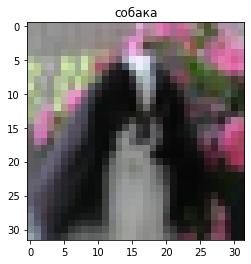

In [4]:
N = 42
plt.imshow(X_test[N])
plt.title(classes[np.argmax(y_test[N,:])])
plt.show()

In [5]:
# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (25, 25), padding='same', input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (20, 20)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(13, 13)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        60032     
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        409632    
                                                                 
 activation_1 (Activation)   (None, 13, 13, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 1, 1, 32)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 1, 1, 32)          0         
                                                        

In [13]:
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test), 
          workers=-1)

Epoch 1/5
50/50 [==============================] - 1645s 33s/step - loss: 2.1408 - accuracy: 0.1853 - val_loss: 1.9716 - val_accuracy: 0.2725
Epoch 2/5
50/50 [==============================] - 1658s 33s/step - loss: 1.9703 - accuracy: 0.2561 - val_loss: 1.8427 - val_accuracy: 0.3210
Epoch 3/5
50/50 [==============================] - 1664s 33s/step - loss: 1.8826 - accuracy: 0.2951 - val_loss: 1.7481 - val_accuracy: 0.3585
Epoch 4/5
50/50 [==============================] - 1663s 33s/step - loss: 1.8052 - accuracy: 0.3321 - val_loss: 1.7014 - val_accuracy: 0.3816
Epoch 5/5
50/50 [==============================] - 1661s 33s/step - loss: 1.7565 - accuracy: 0.3489 - val_loss: 1.6549 - val_accuracy: 0.3953


2. оценить рост точности при увеличении ширины сети (больше фильтров)

Добавим больше фильтров в предыдущую модель, вместо 32 возьмем 50 в каждой свертке.

In [14]:
# больше фильтров
model_2 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model_2.add(Conv2D(50, (25, 25), padding='same', input_shape=X_train.shape[1:]))
model_2.add(Activation('relu'))
model_2.add(Conv2D(50, (20, 20)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(13, 13)))
model_2.add(Dropout(0.25))

# полносвязные слои нейронной сети
model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

model_2.summary()

# компиляция модели
model_2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 32, 50)        93800     
                                                                 
 activation_22 (Activation)  (None, 32, 32, 50)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 13, 13, 50)        1000050   
                                                                 
 activation_23 (Activation)  (None, 13, 13, 50)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 1, 1, 50)         0         
 2D)                                                             
                                                                 
 dropout_11 (Dropout)        (None, 1, 1, 50)          0         
                                                      

In [15]:
model_2.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test),
          workers=4)

Epoch 1/5
50/50 [==============================] - 2758s 55s/step - loss: 2.1445 - accuracy: 0.1866 - val_loss: 1.9590 - val_accuracy: 0.2758
Epoch 2/5
50/50 [==============================] - 2762s 55s/step - loss: 1.8912 - accuracy: 0.3033 - val_loss: 1.7610 - val_accuracy: 0.3664
Epoch 3/5
50/50 [==============================] - 2729s 55s/step - loss: 1.7684 - accuracy: 0.3551 - val_loss: 1.6430 - val_accuracy: 0.4056
Epoch 4/5
50/50 [==============================] - 2695s 54s/step - loss: 1.6991 - accuracy: 0.3835 - val_loss: 1.6097 - val_accuracy: 0.4132
Epoch 5/5
50/50 [==============================] - 2699s 54s/step - loss: 1.6409 - accuracy: 0.4085 - val_loss: 1.5489 - val_accuracy: 0.4405


Качество модели немного выросло, по сравнению с предыдующей моделью

3. оценить рост точности при увеличении глубины сети (больше слоев). 

Теперь в самую первую модель добавим еще один сверточный слой и пуллинг

In [16]:
# больше слоев
model_3 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model_3.add(Conv2D(32, (25, 25), padding='same', input_shape=X_train.shape[1:]))
model_3.add(Activation('relu'))
model_3.add(Conv2D(32, (20, 20)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(16, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

# полносвязные слои нейронной сети
model_3.add(Flatten())
model_3.add(Dense(512))
model_3.add(Activation('relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(num_classes))
model_3.add(Activation('softmax'))

model_3.summary()

# компиляция модели
model_3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 32, 32, 32)        60032     
                                                                 
 activation_26 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_23 (Conv2D)          (None, 13, 13, 32)        409632    
                                                                 
 activation_27 (Activation)  (None, 13, 13, 32)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 dropout_13 (Dropout)        (None, 6, 6, 32)          0         
                                                      

In [17]:
model_3.fit(X_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(X_test, y_test),
            workers=-1)

Epoch 1/5
50/50 [==============================] - 1668s 33s/step - loss: 2.1819 - accuracy: 0.1664 - val_loss: 1.9845 - val_accuracy: 0.2777
Epoch 2/5
50/50 [==============================] - 1679s 34s/step - loss: 1.9398 - accuracy: 0.2794 - val_loss: 1.8916 - val_accuracy: 0.3211
Epoch 3/5
50/50 [==============================] - 1678s 34s/step - loss: 1.8561 - accuracy: 0.3162 - val_loss: 1.7725 - val_accuracy: 0.3553
Epoch 4/5
50/50 [==============================] - 1677s 34s/step - loss: 1.7986 - accuracy: 0.3410 - val_loss: 1.7469 - val_accuracy: 0.3670
Epoch 5/5
50/50 [==============================] - 1670s 33s/step - loss: 1.7581 - accuracy: 0.3600 - val_loss: 1.6906 - val_accuracy: 0.3930


Видно, что качество на обучении немного выросло по сравнению с предыдущей моделью, но примерно такой же результат на тесте, то есть у более глубокой сети уменьшился разрыв на обучении и тесте, соответмтвенно, переобучение немного уменьшилось. Теперь добавим аугментацию

In [18]:
# с аугментацией

# установка параметров нейросети
batch_size = 500
num_classes = 10
epochs = 5
data_augmentation = True

if not data_augmentation:
    print('Не используется data augmentation')
    model_3.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_test, y_test),
              shuffle=True)
else:
    print('Использование data augmentation')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=10, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0.2, 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)


    train_gen = datagen.flow(X_train, 
                             y_train,
                             batch_size=batch_size)
    
    # запуск data augmentation через fit_generator
    model_3.fit(train_gen,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_test, y_test),
              workers=-1)

Использование data augmentation
Epoch 1/5
100/100 [==============================] - 1673s 17s/step - loss: 1.8270 - accuracy: 0.3337 - val_loss: 1.6974 - val_accuracy: 0.3859
Epoch 2/5
100/100 [==============================] - 1678s 17s/step - loss: 1.7742 - accuracy: 0.3510 - val_loss: 1.6957 - val_accuracy: 0.4062
Epoch 3/5
100/100 [==============================] - 1672s 17s/step - loss: 1.7483 - accuracy: 0.3643 - val_loss: 1.6304 - val_accuracy: 0.4205
Epoch 4/5
100/100 [==============================] - 1675s 17s/step - loss: 1.7163 - accuracy: 0.3775 - val_loss: 1.5763 - val_accuracy: 0.4357
Epoch 5/5
100/100 [==============================] - 1679s 17s/step - loss: 1.6947 - accuracy: 0.3840 - val_loss: 1.5721 - val_accuracy: 0.4304


Видно, что добавление аугментации приводит к улучшению качества модели